In [50]:
from bs4 import BeautifulSoup as bs
import numpy as np
import json
import re
import pandas as pd
from urllib.request import urlopen 
from urllib.parse import urljoin
import requests
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
## Se pude el codigo html
## Vector que guarda las urls
Urls = []

# string_Datos=
i=1
print("Comenzo a leer las urls")
while True:
    url = requests.get('https://distiller.com/search?page='+str(i)+'&term=bourbon')
    if (url.status_code == 200):
        
        obj_soup = bs(url.text,'html.parser')
        
        Direcciones= obj_soup.find_all('a',href = True)
        
       
        for direccion in Direcciones:

            extension_direccion = direccion['href']
            
            if extension_direccion.startswith('/spirits'):

                clase_direccion = urljoin('https://distiller.com',extension_direccion)
                
                
                Urls.append(clase_direccion)
        i += 1
    else:
        continue
    if(i == 50):
        break
    

print("Termino de leer las urls")


Comenzo a leer las urls
Termino de leer las urls


## WEB SCRAPING
Todos datos fueron guardados en variables tipo string para no tener problemas a la hora de guardar las variables en una matriz normal,
Todos datos fueron obtenido sin hacer modificación alguna, excepto los datos del año, algunos de estos datos estaban en intervalos, por lo cual, se tomo el valor mayor, considerando que su intervalo no era tan grande y la diferencia del promedio era y el valor mayor era pequeña.

In [7]:
archivo = open('Licores.csv', 'w+')
linea = archivo.readline().strip()
texto_dentro = "Name, Type, Cask, Location, Age, ABV %, Price, Badge, # Ratings, Customer' Rating, Flavor Summary, Expert, Expert Score, Smoky, Peaty, Spicy, Herbal, Oily, Full-bodied, Rich, Sweet, Briny, Salty, Vanilla, Tart, Fruity, Floral, Review"

datos_1 = [[]]
datos_1[0].append("Name")
datos_1[0].append("Type")
datos_1[0].append("Cask")
datos_1[0].append("Location")
datos_1[0].append("Age")
datos_1[0].append("ABV %")
datos_1[0].append("Price")
datos_1[0].append("Badge")
datos_1[0].append("# Rating")
datos_1[0].append("Customer' Rating")
datos_1[0].append("Flavor Summary")
datos_1[0].append("Expert")
datos_1[0].append("Expert Score")
datos_1[0].append("Smoky")
datos_1[0].append("Peaty")
datos_1[0].append("Spicy")
datos_1[0].append("Herbal")
datos_1[0].append("Oily")
datos_1[0].append("Full-Bodied")
datos_1[0].append("Rich")
datos_1[0].append("Sweet")
datos_1[0].append("Briny")
datos_1[0].append("Salty")
datos_1[0].append("Vanilla")
datos_1[0].append("Tart")
datos_1[0].append("Fruity")
datos_1[0].append("Floral")
datos_1[0].append("Review")
datos_1.append([])
f=1
if linea == "":

    for url in range(len(Urls)):
        link = requests.get(Urls[url])
        if (link.status_code == 200):
            nombre = ""
            tipo = ""
            cask = ""
            Nombre_Ubicacion = ""
            Age = ""
            abv = ""
            costo = ""
            badge = ""
            cant_Review = ""
            Clasi_Clien = ""
            perfil_sabor = ""
            nombre_Experto = ""
            score = ""
            smoky = ""
            Peaty = ""
            spicy = ""
            Herbal = ""
            Oily = ""
            Full_bodied = ""
            Rich = ""
            Sweet = ""
            Briny = ""
            Salty = ""
            Vanilla = ""
            Tart = ""
            Fruity = ""
            Floral = ""
            review = ""
            #texto html de la pagina
            Texto_html = bs(link.text,'html.parser')
            #encuentra el elemto canvas que que comienza con esto ↓ 
            elemento_Canvas = Texto_html.find('canvas', class_='js-flavor-profile-chart')
            #obtienes la lista de elementos que con esta ↓ variable, que esta en formato json
            if elemento_Canvas:
                Datos_Sabores = elemento_Canvas.get('data-flavors')
                
                #Obtienes una lista de las variables antes mencionadas.
                Dictado_Sabores = json.loads(Datos_Sabores)
                if Dictado_Sabores.get('smoky') is not None:
                    smoky = str(Dictado_Sabores.get('smoky'))
                else:
                    smoky = " "
                if Dictado_Sabores.get('peaty') is not None:

                    Peaty = str(Dictado_Sabores.get('peaty'))
                    
                else:
                    Peaty = " "
                if Dictado_Sabores.get('spicy') is not None:

                    spicy = str(Dictado_Sabores.get('spicy'))
                else:
                    spicy = " "
                if Dictado_Sabores.get('herbal') is not None:

                    Herbal = str(Dictado_Sabores.get('herbal'))
                else:
                    Herbal = " "
                if Dictado_Sabores.get('oily') is not None:

                    Oily = str(Dictado_Sabores.get('oily'))
                else:
                    Oily = " "
                if Dictado_Sabores.get('full_bodied') is not None:

                    Full_bodied = str(Dictado_Sabores.get('full_bodied'))
                else:
                    Full_bodied = " "
                if Dictado_Sabores.get('rich') is not None:

                    Rich = str(Dictado_Sabores.get('rich'))
                else:
                    Rich = " "
                if Dictado_Sabores.get('sweet') is not None:

                    Sweet = str(Dictado_Sabores.get('sweet'))
                else:
                    Sweet = " "
                if Dictado_Sabores.get('briny') is not None:

                    Briny = str(Dictado_Sabores.get('briny'))
                else:
                    Briny = " "
                if Dictado_Sabores.get('salty') is not None:

                    Salty = str(Dictado_Sabores.get('salty'))
                else:
                    Salty = " "
                if Dictado_Sabores.get('vanilla') is not None:

                    Vanilla = str(Dictado_Sabores.get('vanilla'))
                else:
                    Vanilla = " "
                if Dictado_Sabores.get('tart') is not None:

                    Tart = str(Dictado_Sabores.get('tart'))
                else:
                    Tart = " "
                if Dictado_Sabores.get('fruity') is not None:
                    Fruity = str(Dictado_Sabores.get('fruity'))
                else:
                    Fruity = " "
                if Dictado_Sabores.get('floral') is not None:

                    Floral = str(Dictado_Sabores.get('floral'))
                else:
                    Floral = " "
            nombre_bool = Texto_html.find('h1', class_='secondary-headline name')
            if nombre_bool is not None:
                nombre = str(nombre_bool.text.strip())
            else:
                nombre_bool = Texto_html.find('h1', class_='secondary-headline name long')
                if nombre_bool is not None:
                    nombre_lista= nombre_bool.text.strip()
                
                    if isinstance(nombre_lista,list):
                        #creo un vector, lo separo, y lo hago un string grande uwu
                        nombre_vector = ''.join(nombre_lista)
                        partes_nombre = nombre_vector.split()
                        nombre =str(''.join(partes_nombre))
                        
            #clasificación cliente
            Ecc= Texto_html.find('div',  class_='rating-display__value average-rating')
            
            if Ecc is not None:

                Clasi_Clien = str(Ecc.find('span', itemprop='ratingValue').text.strip())
            else:
                Clasi_Clien = " "
            #precio
            for i in range(1,6):
                if Texto_html.find('div', class_='spirit-cost cost-'+str(i)):
                    costo = str(i)
            #Se busca con la etiqueta li y el primero que tenga ↓ esto
            encontrar_Age = Texto_html.find('li',class_='detail age') 
            age_modificar = encontrar_Age.find('div', class_='value').text.strip()
            
            if age_modificar.lower() == 'nas':
            
                Age = str(age_modificar)
            elif age_modificar is None:
                Age = " "
            else:
                Age_sin_texto = age_modificar.replace('Year','').strip()
                if '-' in Age_sin_texto:
                    partes = Age_sin_texto.split('-')
                    if len(partes) >=2:
                        
                        age_1=partes[1].replace('years','').strip()
                        Age = str(age_1)
                    
                elif Age_sin_texto.isdigit():
                    Age = str(Age_sin_texto)
                else:
                    Age = " "
            
            #rewie
            encontrar_review = Texto_html.find('span', itemprop='ratingCount')
            if encontrar_review:
                cant_Review = str(encontrar_review.text.strip())
            else:
                cant_Review = " "
            #tipo
            tipo_bool = Texto_html.find('p', class_ = 'ultra-mini-headline type')
            if tipo_bool is not None:
                tipo=tipo_bool.text.strip()
            else:
                tipo = " "
            #ubicación
            Nombre_Ubicacion_bool = Texto_html.find('p', class_ = 'ultra-mini-headline location middleweight')
            if Nombre_Ubicacion_bool is not None:
                Nombre_Ubicacion = str(Nombre_Ubicacion_bool.text.strip())
            else:
                Nombre_Ubicacion = ""
            #Barril
            cask_val_1 = Texto_html.find('li', class_='detail cask-type')

            if cask_val_1 is not None:
                cask_val_2 = cask_val_1.find('div',class_='value')
                if cask_val_2 is not None:
                    cask = str(cask_val_2.text.strip().replace(',', ' '))
                else:
                    cask =" "
            else:
                cask = " "
            
            #Nombre
            nombre_html = Texto_html.find('div', class_='meet-experts')

            Exper_val = Texto_html.find('div', class_='meet-experts')
            if Exper_val is not None:
                Exper_val_1 = Exper_val.find('a', itemprop='author')
                if Exper_val_1 is not None:
                    nombre_Experto = str(Exper_val_1.text.strip())
                else:
                    nombre_Experto = " "
            else:
                nombre_Experto =" "   
            score_val = Texto_html.find('div', class_='distiller-score')
            if score_val is not None:
                score = str(score_val.span.text.strip())
            else:
                score = " "

            abv_val = Texto_html.find('li', class_='detail abv')
            if abv_val is not None:
                abv_val_1 =abv_val.find('div', class_='value')
                if abv_val_1 is not None:
                    abv = str(abv_val_1.text.strip())
                else:
                    abv = " "
            else:
                abv = " "

            perfil_sabor_val =Texto_html.find('div',class_='flavor-profile')
            if perfil_sabor_val is not None:
                perfil_sabor_val_1 =perfil_sabor_val.find('h3',class_='secondary-headline flavors middleweight')
                if perfil_sabor_val_1 is not None:
                    perfil_sabor= str(perfil_sabor_val_1.text.strip())
                else:
                    perfil_sabor = " "
            else:
                perfil_sabor =" "
            review_val = Texto_html.find('blockquote', itemprop='reviewBody')
            if review_val is not None:
                review = str(review_val.text.strip())
            else:
                review = " "
            badge_val = Texto_html.find('div', class_='spirit-badge')
            if badge_val is not None:
                badge = str(badge_val.text.strip())
            else:
                badge =" "
            
            
            texto_dentro = str(nombre) + "," + str(tipo) + "," + str(cask) + "," + str(Nombre_Ubicacion) + "," + str(Age) + "," + str(abv) + "," + str(costo) + "," + str(badge) + "," + str(cant_Review) + "," + str(Clasi_Clien) + "," + str(perfil_sabor) + "," + str(nombre_Experto) + "," + str(score) + "," + str(smoky) + "," + str(Peaty) + "," + str(spicy) + "," + str(Herbal) + "," + str(Oily) + "," + str(Full_bodied) + "," + str(Rich) + "," + str(Sweet) + "," + str(Briny) + "," + str(Salty) + "," + str(Vanilla) + "," + str(Tart) + "," + str(Fruity) + "," + str(Floral) + "," + str(review)  +"\n" 
            datos_1.append([])
            datos_1[f].append(str(nombre))
            datos_1[f].append(str(tipo))
            datos_1[f].append(str(cask))
            datos_1[f].append(str(Nombre_Ubicacion))
            datos_1[f].append(str(Age)) 
            datos_1[f].append(str(abv))
            datos_1[f].append(str(costo))
            datos_1[f].append(str(badge))
            datos_1[f].append(str(cant_Review))
            datos_1[f].append(str(Clasi_Clien))
            datos_1[f].append(str(perfil_sabor))
            datos_1[f].append(str(nombre_Experto))
            datos_1[f].append(str(score))
            datos_1[f].append(str(smoky))
            datos_1[f].append(str(Peaty))
            datos_1[f].append(str(spicy))
            datos_1[f].append(str(Herbal))
            datos_1[f].append(str(Oily))
            datos_1[f].append(str(Full_bodied))
            datos_1[f].append(str(Rich))
            datos_1[f].append(str(Sweet))
            datos_1[f].append(str(Briny))
            datos_1[f].append(str(Salty))
            datos_1[f].append(str(Vanilla))
            datos_1[f].append(str(Tart))
            datos_1[f].append(str(Fruity))
            datos_1[f].append(str(Floral))
            datos_1[f].append(str(review))
            archivo.write(texto_dentro)
            f +=1
                
        
        
print("Fin")
archivo.close()

3.7
4.05
3.66
3.48
3.45
3.99
3.62
3.68
3.89
4.16
3.85
4.5
3.56
3.94
3.47
3.47
3.73
3.97
4.12
3.65
4.33
4.0
4.25
4.0
3.8
3.75
4.32
3.77
4.14
3.63
4.0
3.71
3.54
4.25
3.99
4.13
3.52
3.51
4.04
3.59
3.8
3.75
4.22
4.1
3.66
3.57
3.57
3.25
4.29
3.66
3.77
3.9
3.8
3.4
3.68
4.03
3.45
3.88
4.12
3.88
3.88
3.97
3.83
3.48
3.56
4.11
3.59
3.77
3.7
3.14
3.74
3.78
3.59
3.8
4.0
3.97
3.25
3.43
2.78
4.1
3.88
3.53
4.11
4.25
3.88
3.0
3.25
3.67
3.92
4.0
3.83
3.67
4.25
4.63
4.13
3.75
4.17
2.88
2.88
4.5
4.0
4.0
3.5
4.0
5.0
4.0
4.0
4.0
4.0
5.0
3.5
4.0
4.5
4.0
4.0
4.42
2.98
3.38
3.79
3.98
4.31
4.26
3.78
3.27
4.06
4.3
3.83
4.0
3.86
4.19
3.35
3.75
3.57
4.0
3.86
3.83
4.19
4.28
4.38
3.98
3.71
2.9
3.88
3.9
3.53
3.63
3.73
3.93
3.37
3.65
3.3
3.71
4.13
3.27
3.16
3.72
3.64
3.42
3.81
3.66
3.87
3.46
3.39
3.7
3.55
4.26
3.84
3.93
4.27
4.06
3.89
3.84
3.28
3.29
3.51
3.49
3.73
2.84
3.36
3.52
3.43
4.38
3.97
3.73
4.12
3.65
3.51
4.38
3.74
3.09
3.19
4.0
4.45
3.63
3.2
4.49
3.24
4.21
3.29
3.5
3.81
3.95
3.4
3.59
3.81
4.04
4.46
4.18
4.28

## Preparación de datos.
observando los datos, de puede deducir que existen muchas variables que pueden afectar el numero de rating de las botellas, en este caso, se inicio, limpiando los datos, eliminando datos en NaN y "", lo que hace esto es disminuir cociderablemente la tabla y al hacer una inspeccion visual de los datos no se logra divisar algun predicor bueno.

array([[<Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='ABV %', ylabel='Age'>,
        <Axes: xlabel='Price', ylabel='Age'>,
        <Axes: xlabel='# Rating', ylabel='Age'>,
        <Axes: xlabel="Customer' Rating", ylabel='Age'>,
        <Axes: xlabel='Smoky', ylabel='Age'>,
        <Axes: xlabel='Peaty', ylabel='Age'>,
        <Axes: xlabel='Spicy', ylabel='Age'>,
        <Axes: xlabel='Herbal', ylabel='Age'>,
        <Axes: xlabel='Oily', ylabel='Age'>,
        <Axes: xlabel='Full-Bodied', ylabel='Age'>,
        <Axes: xlabel='Rich', ylabel='Age'>,
        <Axes: xlabel='Sweet', ylabel='Age'>,
        <Axes: xlabel='Briny', ylabel='Age'>,
        <Axes: xlabel='Vanilla', ylabel='Age'>,
        <Axes: xlabel='Tart', ylabel='Age'>,
        <Axes: xlabel='Fruity', ylabel='Age'>,
        <Axes: xlabel='Floral', ylabel='Age'>],
       [<Axes: xlabel='Age', ylabel='ABV %'>,
        <Axes: xlabel='ABV %', ylabel='ABV %'>,
        <Axes: xlabel='Price', ylabel='ABV %'>,
        <

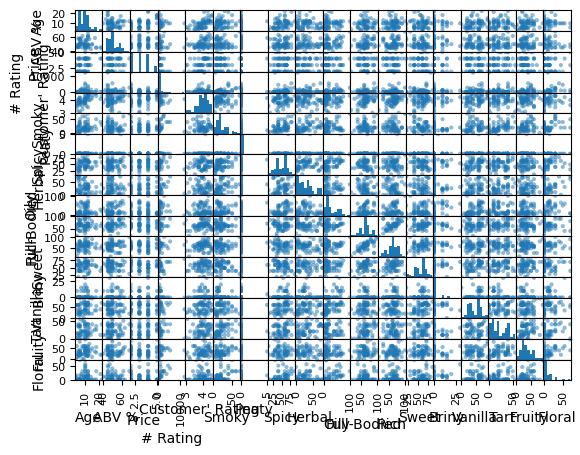

In [8]:
df = pd.DataFrame(datos_1[1:],columns=datos_1[0])

df['Price'] = df["Price"].replace('None', np.nan)

#print(df['Age'].unique)
df['Age'] = df['Age'].replace('None', np.nan)
df['Age'] = df['Age'].replace('NAS', np.nan).replace('nas',np.nan)
df['Age'] = df['Age'].replace(' ', np.nan)
df['Age'] = df['Age'].replace('NaN', np.nan)

df['Smoky'] =df['Smoky'].replace('', np.nan)
df['Peaty'] =df['Peaty'].replace('', np.nan)
df['Spicy'] =df['Spicy'].replace('', np.nan)
df['Herbal'] =df['Herbal'].replace('', np.nan)
df['Oily'] =df['Oily'].replace('', np.nan)
df['Full-Bodied'] =df['Full-Bodied'].replace('', np.nan)
df['Sweet'] =df['Sweet'].replace('', np.nan)
df['Briny'] =df['Briny'].replace('', np.nan)
df['Salty'] =df['Salty'].replace('', np.nan)
df['Vanilla'] =df['Vanilla'].replace('', np.nan)
df['Tart'] =df['Tart'].replace('', np.nan)
df['Fruity'] =df['Fruity'].replace('', np.nan)
df['Floral'] =df['Floral'].replace('', np.nan)
df['Rich'] = df['Rich'].replace('', np.nan)
df['# Rating'] = df['# Rating'].replace(' ', np.nan)


df['# Rating'] = pd.to_numeric(df['# Rating'], errors='coerce', downcast='integer')
df['Price'] = pd.to_numeric(df['Price'])


df.dropna(subset=['Price', '# Rating', "Customer' Rating", 'ABV %'], inplace=True)
df.dropna(subset=['Age', 'Rich','Smoky','Peaty','Spicy','Herbal','Oily','Full-Bodied','Sweet','Briny', 'Vanilla','Tart','Fruity','Floral'], inplace=True)
df['# Rating']= df['# Rating'].astype('float')
df['Price'] = df['Price'].astype('float')
df['Age'] = df['Age'].astype('float')
df['Rich'] = df['Rich'].astype('float')
df["Customer' Rating"] = df["Customer' Rating"].astype('float')
df['Smoky'] = df['Smoky'].astype('float')
df['Peaty'] = df['Peaty'].astype('float')
df['Spicy'] = df['Spicy'].astype('float')
df['Herbal'] = df['Herbal'].astype('float')
df['Oily'] = df['Oily'].astype('float')
df['Full-Bodied'] = df['Full-Bodied'].astype('float')
df['Briny'] = df['Briny'].astype('float')
df['Vanilla'] = df['Vanilla'].astype('float')
df['Tart'] = df['Tart'].astype('float')
df['Fruity'] = df['Fruity'].astype('float')
df['Floral'] = df['Floral'].astype('float')
df['ABV %'] = df['ABV %'].astype('float')
df['Sweet'] = df['Sweet'].astype('float')

pd.plotting.scatter_matrix(df) 



Pero con el .OLS y ocupando el apartado de P>|t|, se puede observar el que valor más pequeño es el del precio, por lo cual este sera el valor a concidera para el proceso de regresión lineal.

In [52]:
x = sm.add_constant(df[['Price','Age',"Customer' Rating",'ABV %', 'Rich','Smoky','Peaty','Spicy','Herbal','Oily','Full-Bodied','Sweet','Briny', 'Vanilla','Tart','Fruity','Floral']])
modelo_ols_1 = sm.OLS(df['# Rating'],x ).fit()
modelo_ols_1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               # Rating   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     1.788
Date:                Thu, 25 Apr 2024   Prob (F-statistic):             0.0592
Time:                        11:09:51   Log-Likelihood:                -561.37
No. Observations:                  65   AIC:                             1159.
Df Residuals:                      47   BIC:                             1198.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -2977.6790   3107.064     -0.958      0.343   -9228.285    3272.927
Price             -721.5148    275.893     -2.615      0.012   -1276.540    -166.489
Age                 65.5393     79.896      0.820      0.416     -95.191     226.270
Customer' Rating   973.7757    868.169      1.122      0.268    -772.755    2720.307
ABV %              -15.6255     50.213     -0.311      0.757    -116.640      85.390
Rich               -18.6991     18.642     -1.003      0.321     -56.203      18.804
Smoky                4.2448     22.774      0.186      0.853     -41.572      50.061
Peaty              -58.1680    358.666     -0.162      0.872    -779.712     663.376
Spicy               11.9796     17.674      0.678      0.501     -23.576      47.535
Herbal               1.7075     12.868      0.133      0.895     -24.180      27.595
Oily                -3.3996     15.175     -0.224      0.824     -33.929      27.130
Full-Bodied         35.4168     21.475      1.649      0.106      -7.786      78.619
Sweet               36.0151     18.648      1.931      0.059      -1.499      73.529
Briny              -41.7346     45.538     -0.916      0.364    -133.345      49.875
Vanilla            -19.8259     13.122     -1.511      0.138     -46.223       6.572
Tart               -34.5225     21.110     -1.635      0.109     -76.990       7.945
Fruity              -0.9867     14.351     -0.069      0.945     -29.856      27.883
Floral              38.2936     17.867      2.143      0.037       2.350      74.237
==============================================================================
Omnibus:                       78.775   Durbin-Watson:                   1.106
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1033.860
Skew:                           3.374   Prob(JB):                    3.16e-225
Kurtosis:                      21.336   Cond. No.                     2.37e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Preparación de datos.
Despues de la visualización se puede obtener datos que pueden ser buenas variables predictorias, revisando 1 por 1 se llega a la conclusión que los datos "Floral", "Customer' Rating" y "Price" son buenas variables predicotiras.


In [55]:
df_2 = pd.DataFrame(datos_1[1:],columns=datos_1[0])
df_2['Price'] = df_2["Price"].replace('None', np.nan)
df_2['# Rating'] = df_2['# Rating'].replace(' ', np.nan)
df_2['Full-Bodied'] = df_2['Full-Bodied'].replace(' ',np.nan)
df_2['Sweet'] =df_2['Sweet'].replace('',np.nan)
df_2['Floral'] = df_2['Floral'].replace('',np.nan)
df_2['Vanilla'] = df_2['Vanilla'].replace('',np.nan)
df_2['Herbal'] = df_2['Herbal'].replace('',np.nan)
df_2["Customer' Rating"] = df_2["Customer' Rating"].replace('',np.nan)
df_2['Age'] = df_2['Age'].replace('',np.nan)
df_2['Rich'] = df_2['Rich'].replace('',np.nan)

df_2['# Rating'] = pd.to_numeric(df_2['# Rating'], errors='coerce', downcast='integer')
df_2['Price'] = pd.to_numeric(df_2['Price'])
df_2['Full-Bodied'] = pd.to_numeric(df_2['Full-Bodied'], errors = 'coerce', downcast='integer')
df_2['Sweet'] = pd.to_numeric(df_2['Sweet'],errors= 'coerce',downcast= 'integer')
df_2['Floral'] = pd.to_numeric(df_2['Floral'],errors= 'coerce',downcast= 'integer')
df_2['Vanilla'] = pd.to_numeric(df_2['Vanilla'],errors= 'coerce',downcast='integer')
df_2['Herbal'] = pd.to_numeric(df_2['Herbal'],errors='coerce',downcast='integer')
df_2["Customer' Rating"] = pd.to_numeric(df_2["Customer' Rating"],errors='coerce',downcast='integer')
df_2['Age']= pd.to_numeric(df_2['Age'],errors='coerce',downcast='integer')
df_2['Rich']=pd.to_numeric(df_2['Rich'],errors='coerce',downcast='integer')

df_2.dropna(subset=['Price','# Rating','Floral',"Customer' Rating"], inplace=True)
df_2['# Rating'] = df_2['# Rating'].astype('float')
df_2['Price'] = df_2['Price'].astype('float')
df_2['Full-Bodied'] = df_2['Full-Bodied'].astype('float')
df_2['Sweet'] = df_2['Sweet'].astype('float')
df_2['Floral'] = df_2['Floral'].astype('float')
df_2['Vanilla'] = df_2['Vanilla'].astype('float')
df_2['Herbal'] = df_2['Herbal'].astype('float')
df_2["Customer' Rating"] = df_2["Customer' Rating"].astype('float')
df_2['Age'] = df_2['Age'].astype("float")
df_2['Rich'] = df_2['Rich'].astype('float')

x_2= sm.add_constant(df_2[['Price','Floral',"Customer' Rating"]])
modelo_ols_3 = sm.OLS(df_2['# Rating'],x_2).fit()
modelo_ols_3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               # Rating   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     13.23
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           5.19e-08
Time:                        11:13:08   Log-Likelihood:                -2146.4
No. Observations:                 240   AIC:                             4301.
Df Residuals:                     236   BIC:                             4315.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1359.2991   1430.649     -0.950      0.343   -4177.773    1459.175
Price             -814.9156    146.669     -5.556      0.000   -1103.864    -525.967
Floral              13.6435      6.727      2.028      0.044       0.392      26.895
Customer' Rating  1172.5211    425.530      2.755      0.006     334.198    2010.845
==============================================================================
Omnibus:                      188.867   Durbin-Watson:                   0.427
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2020.539
Skew:                           3.183   Prob(JB):                         0.00
Kurtosis:                      15.709   Cond. No.                         287.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Entranmiento de los datos.
En este apartado, se ocuparan los datos encontrados anteriormente para realizar un entrenamientos con estos en una proporción de 80% de prueba.

In [44]:
val_x = df_2['# Rating'].to_frame()
val_y = df_2[['Price','Floral',"Customer' Rating"]]


Se entrenan las variables.

In [45]:
x_Train, x_Test, y_Train, y_Test = train_test_split(val_x,val_y,test_size=0.8)


In [46]:
modelo = LinearRegression()
modelo.fit(x_Train, y_Train)

y_predic_test = modelo.predict(x_Test)

Al revisar los resultadosd el error cuadratico medio es relativamente bueno pero el error cuadrativo no es bueno siendo esto, por la diferencia de escala de los datos.


In [47]:
mse = mean_squared_error(y_Test, y_predic_test)

r2 = r2_score(y_Test, y_predic_test)

print(f'El valor del mse es:{mse} y el valor del r^2 es de: {r2}')

El valor del mse es:108.89882242952405 y el valor del r^2 es de: 0.01247166262226366
